# adding Linear Regression to the model

```python

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

data=pd.read_csv("data.csv")

print(data.head())


   StudyTime  Score
0          1     50
1          2     52
2          3     55
3          4     56
4          5     58


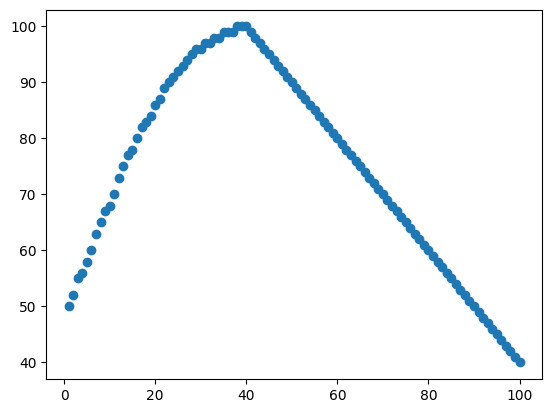

In [4]:
plt.scatter(data.StudyTime,data.Score)
plt.show()

"""Calculates Mean Squared Error between predicted and actual values.
    
    Parameters:
    - m (float): Slope of the line
    - b (float): Intercept of the line
    - points (DataFrame): Contains 'studytime' as input and 'score' as output
    
    Returns:
    - float: Average squared error
    """

   StudyTime  Score
0          1     43
1          2     48
2          3     54
3          4     60
4          5     65
Available columns: Index(['StudyTime', 'Score'], dtype='object')


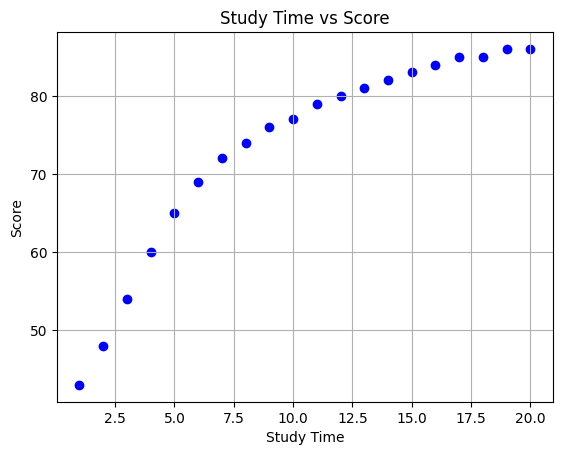

Epoch 0 | Loss: 4240.6417 | m: 0.8389, b: 0.0734
Epoch 50 | Loss: 627.8342 | m: 5.7746, b: 1.0301
Epoch 100 | Loss: 614.0747 | m: 5.7337, b: 1.6152
Epoch 150 | Loss: 600.6293 | m: 5.6914, b: 2.1934
Epoch 200 | Loss: 587.4902 | m: 5.6495, b: 2.7651
Epoch 250 | Loss: 574.6506 | m: 5.6081, b: 3.3301

Final Equation → y = 5.5679x + 3.8776


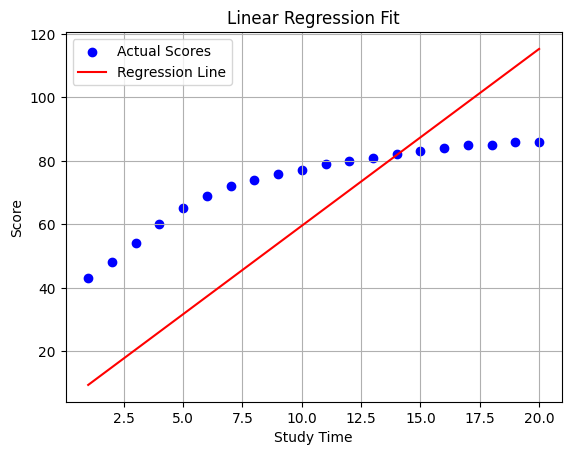

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("data.csv")

# Peek at first few rows
print(data.head())
print("Available columns:", data.columns)

# Scatter plot of raw data
plt.scatter(data["StudyTime"], data["Score"], color="blue")
plt.title("Study Time vs Score")
plt.xlabel("Study Time")
plt.ylabel("Score")
plt.grid(True)
plt.show()

# Loss Function: Mean Squared Error
def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i]["StudyTime"]
        y = points.iloc[i]["Score"]
        prediction = m * x + b
        total_error += (y - prediction) ** 2
    return total_error / float(len(points))

# Gradient Descent Step
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    n = len(points)

    for i in range(n):
        x = points.iloc[i]["StudyTime"]
        y = points.iloc[i]["Score"]
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

# Training Loop
m = 0
b = 0
L = 0.0005
epochs = 300

for i in range(epochs):
    m, b = gradient_descent(m, b, data, L)
    if i % 50 == 0:
        loss = loss_function(m, b, data)
        print(f"Epoch {i} | Loss: {loss:.4f} | m: {m:.4f}, b: {b:.4f}")

print(f"\nFinal Equation → y = {m:.4f}x + {b:.4f}")

# Final Plot: Regression line over scatter
plt.scatter(data["StudyTime"], data["Score"], label="Actual Scores", color="blue")
plt.plot(data["StudyTime"], [m * x + b for x in data["StudyTime"]], color="red", label="Regression Line")
plt.title("Linear Regression Fit")
plt.xlabel("Study Time")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()